## DATA SCIENCE SALARIES 2023

### Import Libraries

In [92]:
import kaggle
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pycountry

In [53]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('arnabchaki/data-science-salaries-2023', path='./', unzip=True)


## Exploratory Data Analysis

In [54]:
salary_df = pd.read_csv("ds_salaries.csv")

In [55]:
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [56]:
salary_df.info

<bound method DataFrame.info of       work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  

In [57]:
salary_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [58]:
# change work year into datetime format
salary_df = salary_df.rename(columns={"work_year" : "year"})

In [59]:
salary_df["year"] = pd.to_datetime(salary_df["year"], format="%Y").dt.year

In [62]:
# change symbols for better understanding
salary_df["experience_level"] = salary_df["experience_level"].replace("EN", "Entry Level") 
salary_df["experience_level"] = salary_df["experience_level"].replace("MI", "Junior") 
salary_df["experience_level"] = salary_df["experience_level"].replace("SE", "Senior ") 
salary_df["experience_level"] = salary_df["experience_level"].replace("EX", "Executive/Director") 

In [63]:
employment_type_dict = {
    "FT" : "Full Time",
    "CT" : "Contract",
    "FL" : "Seasonal",
    "PT" : "Part Time"
}

# using map instead of replace
salary_df["employment_type"] = salary_df["employment_type"].map(employment_type_dict)
salary_df.head()

,year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Junior,Contract,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Junior,Contract,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior,Full Time,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior,Full Time,Data Scientist,120000,USD,120000,CA,100,CA,M


In [64]:
# change country code to country name
def get_country_name(code) :
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return "Unknown"

In [66]:
salary_df["company_location"] = salary_df["company_location"].apply(get_country_name)
salary_df['company_location']

0               Spain
1       United States
2       United States
3              Canada
4              Canada
            ...      
3750    United States
3751    United States
3752    United States
3753    United States
3754            India
Name: company_location, Length: 3755, dtype: object

## Analysis and Visualizations

### 1. What is the average salary of data science jobs in a specific geographic location?


In [80]:
salary_per_location = salary_df.groupby("company_location")["salary_in_usd"].agg(lambda x : round(np.mean(x), 2))
salary_per_location = salary_per_location.sort_values(ascending=False).reset_index()

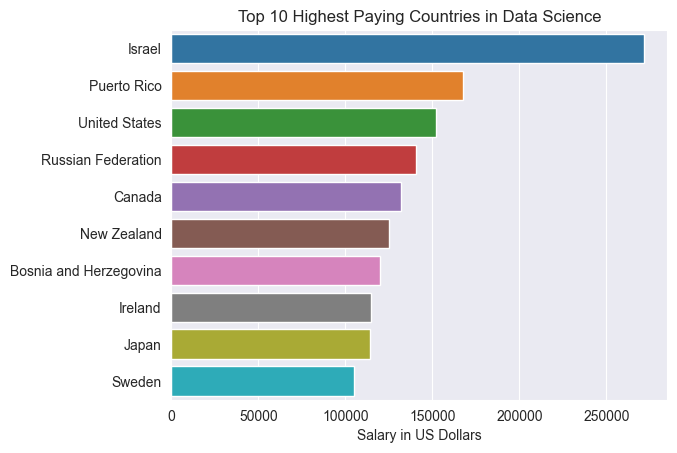

In [88]:
sns.set_style("darkgrid")
sns.barplot(x = "salary_in_usd", y = "company_location", data=salary_per_location.head(10))

plt.xlabel("Salary in US Dollars")
plt.ylabel("")
plt.title("Top 10 Highest Paying Countries in Data Science")
plt.show()

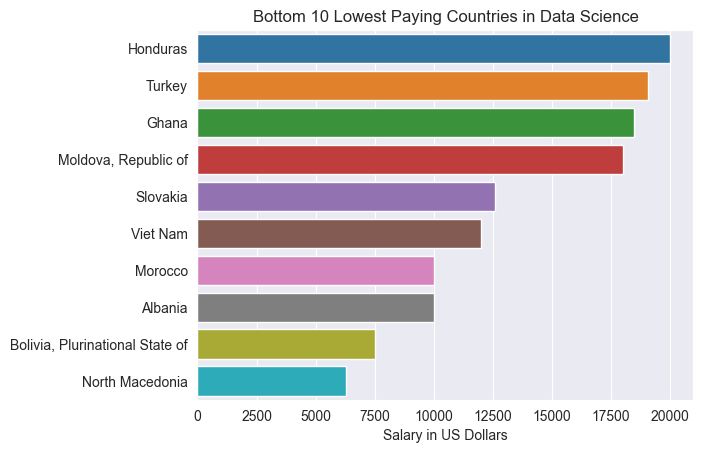

In [90]:
sns.set_style("darkgrid")
sns.barplot(x = "salary_in_usd", y = "company_location", data=salary_per_location.tail(10))

plt.xlabel("Salary in US Dollars")
plt.ylabel("")
plt.title("Bottom 10 Lowest Paying Countries in Data Science")
plt.show()

### 

We found that Isreal has the highest average salary in data science of $270,000, followed by the United States at around $160,000. This suggests that these countries value the field of data science and its applications. The high average salary in Isreal indicates a strong emphasis on data science as a critical field for driving innovation, economic growth and technological advances. 

The higher average salaries in these countries suggests that they recongnize the importance of attracting and retaining talents in this field. 

### 2. What are the most common job titles in the field of data science, and how do their salaries differ?


In [102]:
job_count = salary_df["job_title"].value_counts().reset_index()

In [107]:
job_count.columns = ["job_title", "count"]

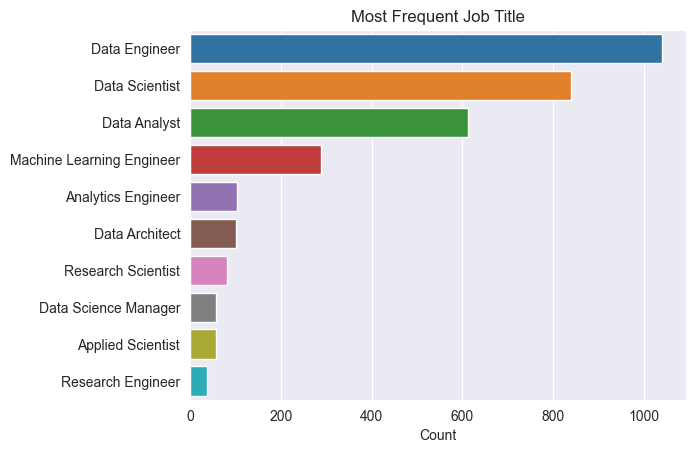

In [110]:
sns.barplot(x = "count",
            y = "job_title", 
            data = job_count.head(10))

plt.title("Most Frequent Job Title")
plt.xlabel("Count")
plt.ylabel("")
plt.show()

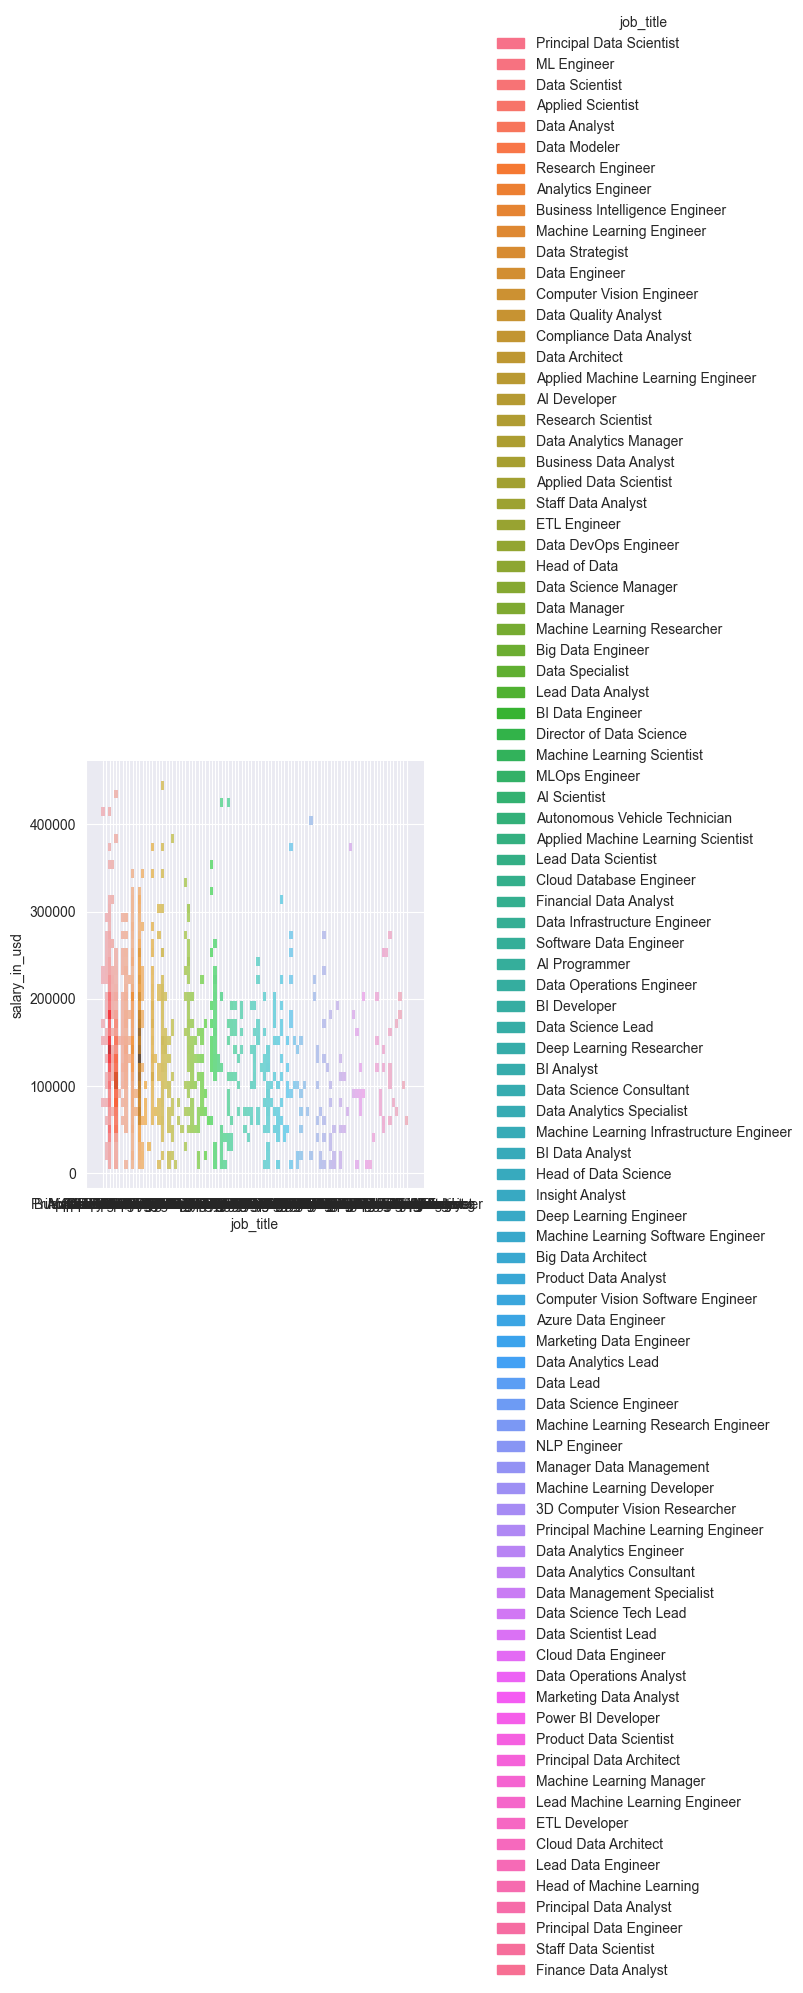

In [111]:
sns.distplot(x = "job_title", y = "salary_in_usd", data = salary_df, hue = "job_title")

plt.show()

###
provide summary of findings here

3. What is the distribution of salaries among entry-level, mid-level, and senior data science positions?



4. How does the size of the company (small, medium, large) impact the salaries of data science professionals?



5. What is the average salary growth rate for data scientists over the past few years?


6. How does the salary of data science managers compare to individual contributors?


7. Are there any regional variations in data science salaries within a country or across different countries?


8. Is there a difference in salaries based on the type of employment (full-time, part-time, contract) in data science?
